Duvall Pinkney WEEK 4 homework: classification
Evaluate k-nearest-neighbor method with different k values on the dataset used in Week 03 notebook (Source: https://raw.githubusercontent.com/empathy87/The-Elements-of-Statistical-Learning-Python-Notebooks/master/data/mixture.txt)

1. Load the data as a Pandas data frame.

2. Split the data into 80% training data and 20% test data.

3. Build three k-nearest-neighbor model with k = 1, 5, 25, respectively.

4. Train the models on the training set, and obtain the model predictions on the test set.

5. Calculate the test accuracy score for each model. Which k value give the best accuracy score?

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
url = "https://pjreddie.com/media/files/mnist_train.csv"
    
train_data = pd.read_csv(url, header=None, sep=',') 
train_data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
url2 = "https://pjreddie.com/media/files/mnist_test.csv"
    
test_data = pd.read_csv(url2, header=None, sep=',') 
test_data   

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
print("Shape:",test_data.shape)
print("Columns names", test_data.columns)
print("Data types: ", test_data.dtypes)

Shape: (10000, 785)
Columns names Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            775, 776, 777, 778, 779, 780, 781, 782, 783, 784],
           dtype='int64', length=785)
Data types:  0      int64
1      int64
2      int64
3      int64
4      int64
       ...  
780    int64
781    int64
782    int64
783    int64
784    int64
Length: 785, dtype: object


In [42]:
print("Shape:",train_data.shape)
print("Columns names", train_data.columns)
print("Data types: ", train_data.dtypes)

Shape: (59999, 785)
Columns names Index(['5', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.608', '0.609', '0.610', '0.611', '0.612', '0.613', '0.614', '0.615',
       '0.616', '0.617'],
      dtype='object', length=785)
Data types:  5        int64
0        int64
0.1      int64
0.2      int64
0.3      int64
         ...  
0.613    int64
0.614    int64
0.615    int64
0.616    int64
0.617    int64
Length: 785, dtype: object


In [57]:
data = train_data.rename({0: 'label'}, axis=1)
data['label'].value_counts().sort_index()

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: label, dtype: int64

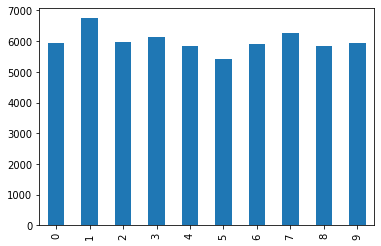

In [59]:
data['label'].value_counts().sort_index().plot.bar()

In [60]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [23]:
testing_data = split_train_test(test_data, 0.2)
len(testing_data)

2

In [24]:
training_data = split_train_test(train_data, 0.8)
len(training_data)

2

In [62]:
# Visualize data as images
ind = 123 # Going to show the image on this row
input_features = [x for x in data.columns if x != "label"]
# print(input_features)
data_example = data.loc[ind, input_features] # Use .loc[] expression to extract data from a data frame.
print(data_example.shape)

(784,)


In [63]:
# Convert the data example to a numpy array
data_example_array = data_example.values
print(data_example_array.shape)

(784,)


In [64]:
# Transform the array to a 28*28 2D array
data_example_array_transformed = data_example_array.reshape([28, 28])
print(data_example_array_transformed.shape)
print(data_example_array_transformed)

(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  38 113 113 1

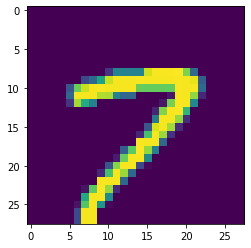

In [65]:
plt.imshow(data_example_array_transformed)

In [66]:
# Write a function to automate the process
def get_image(data, ind):
    # Use data.loc to extract the 784 pixel values
    
    input_features2 = [column for column in data.columns if column != 'label']
    data_example = data.loc[ind, input_features2]
    
    
    # Convert the list to a numpy array
    data_example_numpyArray = data_example.values
    
    # Change the shape to [28, 28]
    data_example_numpyArray_transformed = data_example_numpyArray.reshape([28,28])
    
    # Use imshow() to display the image.    
    plt.imshow(data_example_numpyArray_transformed)
    
#     return data_example_array_transformed

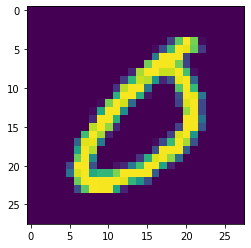

In [67]:
ind = 4321
get_image(data, ind)

In [39]:

# How to evaluate the kNN model?

# Visualize the decision region.

# 1. create a 100 * 100 grid of points to cover the entire plane.
plot_data = pd.DataFrame()
x1_coordinates = np.linspace(-3, 4, 100) # sample 100 points per row
x2_coordinates = np.linspace(-2, 3, 100) # sample 100 rows (total: 100 * 100 = 10,000 points)
for x1 in x1_coordinates:
    for x2 in x2_coordinates:
        plot_data = plot_data.append({'x1': x1,
                               'x2': x2},
                              ignore_index=True)
plot_data

# 2. use the kNN model to make a prediction on each of the 10,000 points.
plot_data['prediction'] = model_3nn.predict(plot_data)
plot_data.head()

,x1,x2
0,-3.0,-2.000000
1,-3.0,-1.949495
2,-3.0,-1.898990
3,-3.0,-1.848485
4,-3.0,-1.797980


In [68]:
# Create a smaller training set to reduce training time
sample_size = 6000
samples = np.random.choice(data.index, sample_size, replace=False)
mnist_train_small = data.loc[samples]
print(mnist_train_small.shape)

(6000, 785)


In [69]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [49]:
input_features = [ x for x in plot_data.columns if x != "label"]

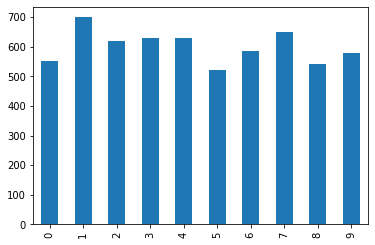

In [70]:
# Verify mnist_train_small still contains enough training examples for each label

mnist_train_small['label'].value_counts().sort_index().plot.bar()

In [71]:
#K nearest neighbor model
#Build three k-nearest-neighbor model with k = 1, 5, 25

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(mnist_train_small[input_features], mnist_train_small['label'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(mnist_train_small[input_features], mnist_train_small['label'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(mnist_train_small[input_features], mnist_train_small['label'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [86]:
# Build a linear SVM classifier
from sklearn.svm import LinearSVC
model_svm = LinearSVC()
model_svm.fit(mnist_train_small[input_features], mnist_train_small['label'])

C:\Users\thees\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [87]:
# Use the model to make predictions on the test images
test_data['prediction_svm'] = model_svm.predict(test_data[input_features])

In [88]:
# Calculate accuracy score

accuracy_score(test_data['label'], test_data['prediction_svm'])

NameError: name 'accuracy_score' is not defined

In [77]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
# Extract rows that are mis-classified

filter1 = (test_data['label'] != test_data['prediction'])
test_data[filter1][['label', 'prediction']]

KeyError: 'label'

In [79]:
# Show one image that is incorrectly classified

# Create a copy of test_data without the prediction and prediction_svm column
test_data2 = test_data.drop(['prediction', 'prediction_svm'], axis=1)

ind = 9922
get_image(test_data2, ind)

KeyError: "['prediction' 'prediction_svm'] not found in axis"

In [76]:
# Show the label and the prediction of this image
print("Label:", test_data.loc[ind, 'label'])
print("Prediction by kNN:", test_data.loc[ind, 'prediction'])

KeyError: 'label'